In [1]:
#import libs
import os, glob
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter("ignore")

In [2]:
DATA_PATH = '../data/processed/Sites_KPI_processed.parquet'
df = pd.read_parquet(DATA_PATH)
df.head(1)

,Time,eNodeB Name,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_DR,EPM_ERAB_SR,EPM_DL_Traffic_GB,EPM_CSFB_Preparation_SR,EPM_CSFB_SR,TE Hourly Avala,TE Availabity Daily,EPM_Dropped_Sessions,L.Cell.Unavail.Dur.Manual(s),L.Cell.Unavail.Dur.Sys(s),L.Cell.Avail.Dur(s),EPM_RRC_Failures,EPM_ERABSR_Failures,EPM_Total_Sessions,EPM_ERABSR_Attempts,EPM_RRC_Attempts
0,2022-04-01,LCAIW30340_Site_83,99.9821,0.2975,0.017,99.9654,4.0582,100.0,100.0,100.0,100.0,1,0,0,32400,1,2,5888,5783,5601


In [4]:
df['Day']=df['Time'].dt.day
df['Hour']=df['Time'].dt.hour
df['Month'] = df['Time'].dt.month
df.head(1)

,Time,eNodeB Name,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_DR,EPM_ERAB_SR,EPM_DL_Traffic_GB,EPM_CSFB_Preparation_SR,EPM_CSFB_SR,TE Hourly Avala,...,L.Cell.Unavail.Dur.Sys(s),L.Cell.Avail.Dur(s),EPM_RRC_Failures,EPM_ERABSR_Failures,EPM_Total_Sessions,EPM_ERABSR_Attempts,EPM_RRC_Attempts,Day,Hour,Month
0,2022-04-01,LCAIW30340_Site_83,99.9821,0.2975,0.017,99.9654,4.0582,100.0,100.0,100.0,...,0,32400,1,2,5888,5783,5601,1,0,4


In [8]:
df_one_hour = df[(df['Month']==4)&(df['Day']==8)&(df['Hour']==0)]
df_one_hour.index = df_one_hour['eNodeB Name']
X = df_one_hour[['EPM_RRC_SR', 'EPM_UL_Traffic_GB', 'EPM_ERAB_SR','EPM_DL_Traffic_GB','EPM_CSFB_Preparation_SR','EPM_CSFB_SR']]
X.head(1)

,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_SR,EPM_DL_Traffic_GB,EPM_CSFB_Preparation_SR,EPM_CSFB_SR
eNodeB Name,,,,,,
LCAIW30340_Site_83,99.988,1.0945,99.9648,6.0615,100.0,100.0


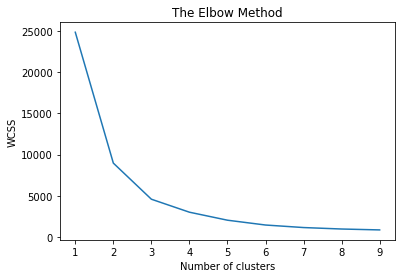

In [9]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
#Kmeans
kmeans = KMeans(n_clusters =3 , init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
#GaussianMixture 
gmm = mixture.GaussianMixture(n_components=3)
y_gmm = gmm.fit_predict(X)
X['cluster']=y_gmm

In [13]:
X['cluster']=y_kmeans
X.head(1)

,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_SR,EPM_DL_Traffic_GB,EPM_CSFB_Preparation_SR,EPM_CSFB_SR,cluster
eNodeB Name,,,,,,,
LCAIW30340_Site_83,99.988,1.0945,99.9648,6.0615,100.0,100.0,2


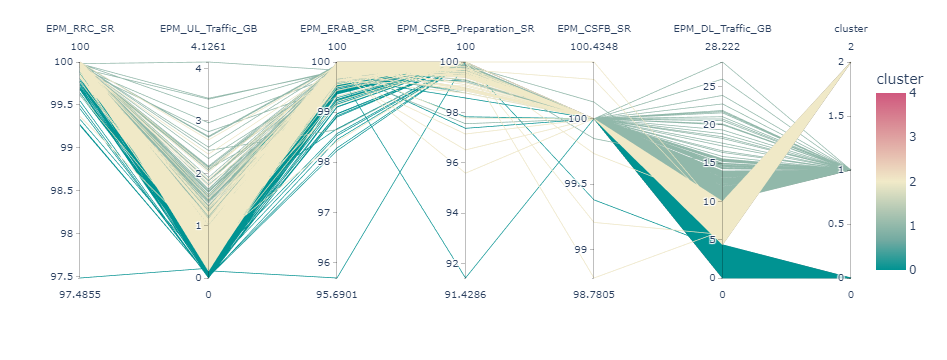

In [43]:
fig = px.parallel_coordinates(X, color="cluster",
                              dimensions=['EPM_RRC_SR', 'EPM_UL_Traffic_GB', 'EPM_ERAB_SR','EPM_CSFB_Preparation_SR','EPM_CSFB_SR',
                                          'EPM_DL_Traffic_GB','cluster'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

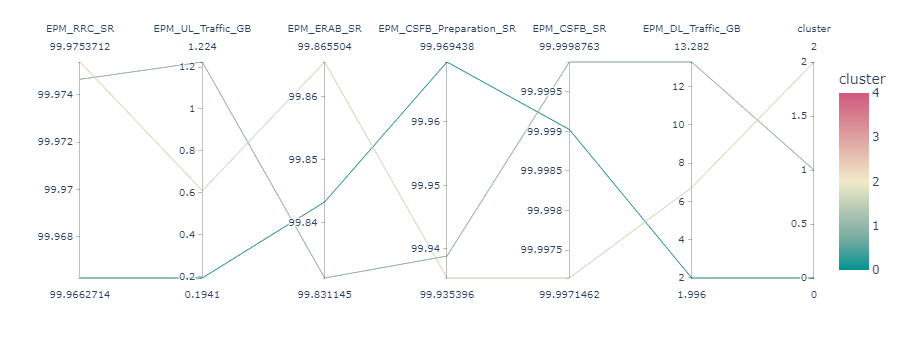

In [44]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['EPM_RRC_SR', 'EPM_UL_Traffic_GB', 'EPM_ERAB_SR', 'EPM_DL_Traffic_GB',
       'EPM_CSFB_Preparation_SR', 'EPM_CSFB_SR'])
centroids['cluster'] = centroids.index

fig = px.parallel_coordinates(centroids, color="cluster",
                              dimensions=['EPM_RRC_SR', 'EPM_UL_Traffic_GB', 'EPM_ERAB_SR','EPM_CSFB_Preparation_SR','EPM_CSFB_SR',
                                          'EPM_DL_Traffic_GB','cluster'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()